In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
missing_values =[ 'N/a', 'na', np.nan]

In [12]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv',na_values=missing_values)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df.shape

(1599, 12)

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# EDA

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


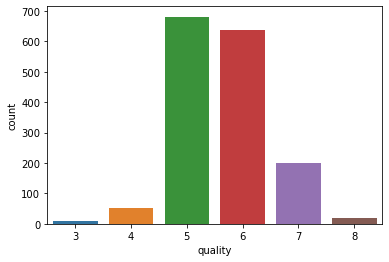

In [18]:
ax= sns.countplot(x='quality',data=df)

print(df['quality'].value_counts())  

From the graph, it can be seen that we have wines in the quality range of 3-8. Also, our dataset is imbalaced since with wines with the quality 5 and 6 are in higher counts. So we need to balance the datapoints.

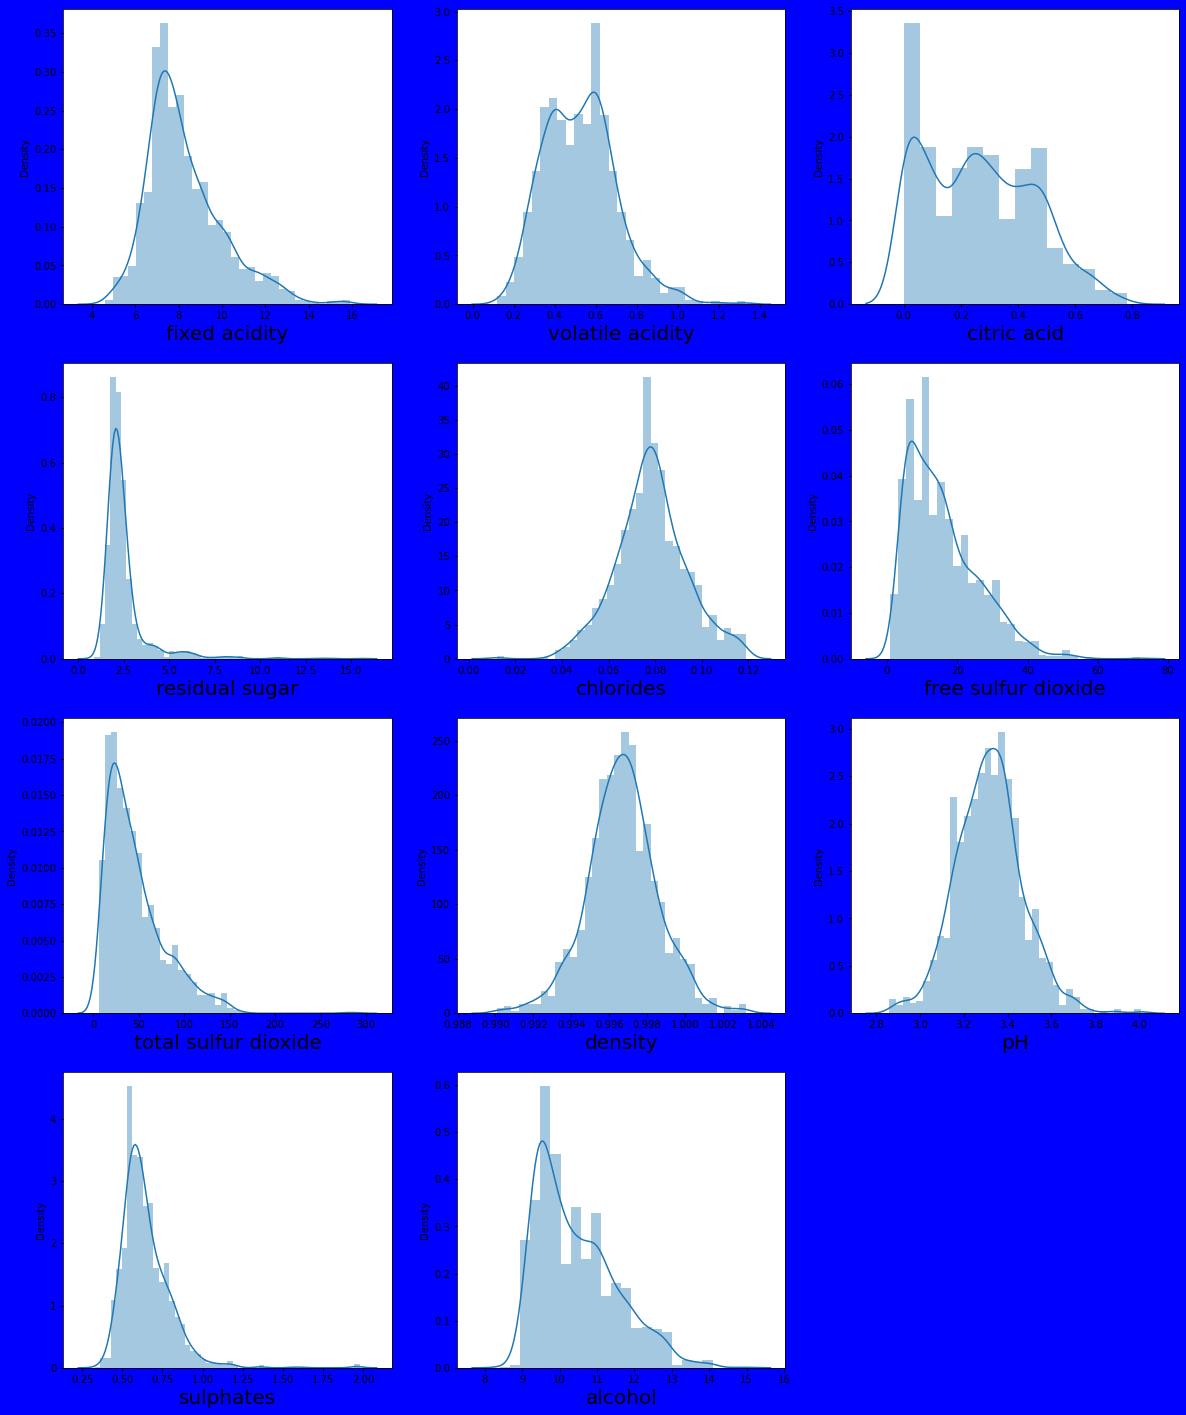

In [24]:
#Lets check for distribuion(all are continous data type)

plt.figure(figsize =(20,25), facecolor='blue')
plotnumber = 1

for column in df :
    if plotnumber <= 11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber +=1
plt.show()

<AxesSubplot:>

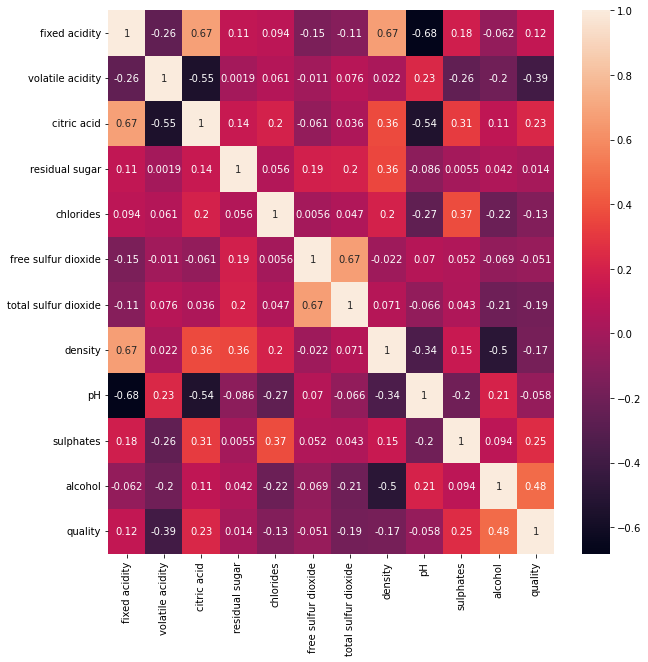

In [11]:
#Checking the correlation using a heatmap:

plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr,annot= True)

On studying his heatmap, we see that quality and alcohol has higher positive correlaion, with citric acid content coming second. However pH and free sulfur dioxide conent has values close to 0 against quality and contribute less to quality of wine.

## Data Preprocessing 

In [13]:
X = df.drop(columns=['quality'])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [14]:
y = df['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [15]:
#We have to change our dataset into a balanced dataset from an imbalanced dataset.
oversample = SMOTE()
X,y= oversample.fit_resample(X,y)

In [18]:
#Now lets encode quality with value above 7 as 1/good and below 7 as bad(0)

y=y.apply(lambda y_value:1 if y_value>=7 else 0)

In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4081    1
4082    1
4083    1
4084    1
4085    1
Name: quality, Length: 4086, dtype: int64

0    2724
1    1362
Name: quality, dtype: int64


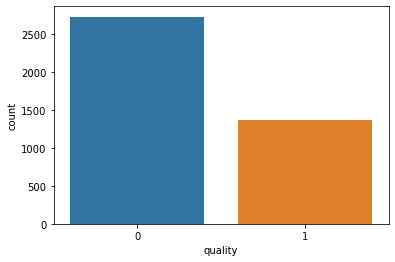

In [19]:
ax= sns.countplot(y)

print(y.value_counts()) 

In [24]:
#Random state selection

MaxAcc = 0
MaxRS =0
for i in range(1,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    predrf= LR.predict(X_test)
    acc= accuracy_score(y_test,predrf)
    print('accuracy',acc,'random_state',1)
    
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS= i
        print('accuracy',MaxAcc,'random_state',i)

accuracy 0.9095354523227384 random_state 1
accuracy 0.9095354523227384 random_state 1
accuracy 0.8985330073349633 random_state 1
accuracy 0.8936430317848411 random_state 1
accuracy 0.8997555012224939 random_state 1
accuracy 0.8973105134474327 random_state 1
accuracy 0.9095354523227384 random_state 1
accuracy 0.8997555012224939 random_state 1
accuracy 0.9119804400977995 random_state 1
accuracy 0.9119804400977995 random_state 8
accuracy 0.8924205378973105 random_state 1
accuracy 0.8875305623471883 random_state 1
accuracy 0.8814180929095354 random_state 1
accuracy 0.902200488997555 random_state 1
accuracy 0.8838630806845966 random_state 1
accuracy 0.882640586797066 random_state 1
accuracy 0.8850855745721271 random_state 1
accuracy 0.8936430317848411 random_state 1
accuracy 0.8997555012224939 random_state 1
accuracy 0.8997555012224939 random_state 1
accuracy 0.9058679706601467 random_state 1
accuracy 0.8973105134474327 random_state 1
accuracy 0.9058679706601467 random_state 1
accuracy 0.89

In [27]:
print('Best accuracy score is',MaxAcc,'Random_state',MaxRS)

Best accuracy score is 0.921760391198044 Random_state 46


In [28]:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=46)


In [36]:
LR.fit(X_train,y_train)
predlr = LR.predict(X_test)
print('Accuracy',accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 92.1760391198044
[[500  39]
 [ 25 254]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       539
           1       0.87      0.91      0.89       279

    accuracy                           0.92       818
   macro avg       0.91      0.92      0.91       818
weighted avg       0.92      0.92      0.92       818



In [41]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt =DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt= dt.predict(X_test)
print('Accuracy',accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 94.25427872860635
[[517  22]
 [ 25 254]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       539
           1       0.92      0.91      0.92       279

    accuracy                           0.94       818
   macro avg       0.94      0.93      0.94       818
weighted avg       0.94      0.94      0.94       818



In [42]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predrf= rf.predict(X_test)
print('Accuracy',accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 97.43276283618582
[[528  11]
 [ 10 269]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       539
           1       0.96      0.96      0.96       279

    accuracy                           0.97       818
   macro avg       0.97      0.97      0.97       818
weighted avg       0.97      0.97      0.97       818



In [43]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
predsvc= svc.predict(X_test)

print('Accuracy',accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 89.60880195599023
[[502  37]
 [ 48 231]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       539
           1       0.86      0.83      0.84       279

    accuracy                           0.90       818
   macro avg       0.89      0.88      0.88       818
weighted avg       0.90      0.90      0.90       818



# Cross validation

In [45]:
from sklearn.model_selection import cross_val_score

scr_7 = cross_val_score(LR,X,y,cv=7)
print("Cross validation score of Logistic Regression model", scr_7.mean())

Cross validation score of Logistic Regression model 0.888194288265366


In [50]:
scr_13 = cross_val_score(dt,X,y,cv=13)
print("Cross validation score of Decision Tree model", scr_13.mean())

Cross validation score of Decision Tree model 0.9212578645699665


In [51]:
scr_13 = cross_val_score(rf,X,y,cv=13)
print("Cross validation score of Random forest model", scr_13.mean())

Cross validation score of Random forest model 0.9474238429652443


In [52]:
scr_13 = cross_val_score(svc,X,y,cv=13)
print("Cross validation score of SVC model", scr_13.mean())

Cross validation score of SVC model 0.8755053156327043


Random Forest Classifier has given us the better result. Hence We shall go with that model

# # Hyperparameter tuning

In [53]:
RandomForestClassifier()

RandomForestClassifier()

In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[3,4,5,6,7,8,9],
             'criterion':['gini','entropy']}


In [55]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(X_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2'}

In [56]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [57]:
GCV.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2')

In [59]:
GCV_pred = GCV.best_estimator_.predict(X_test)
accuracy_score(y_test,GCV_pred) #final accuracy score

0.9682151589242054

Our accuracy score has increased by 2% on hypertuning

# ROC AUC Curve

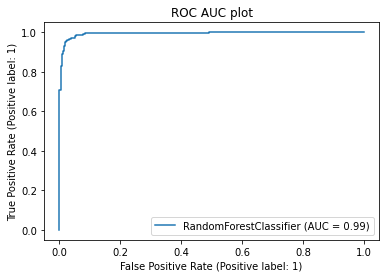

In [64]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,y_test)
plt.title('ROC AUC plot')
plt.show()

So the final accuracy score is 96.82% with AUC score as 99%